[170370.0204065]


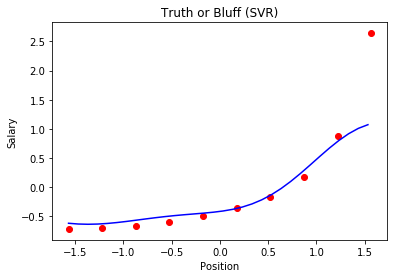

In [40]:
# Importing libraries
# -------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# ---------------------
dataset = pd.read_csv(r'C:\Users\lenovo\Desktop\ml projects\New folder\Machine-Learning-A-Z-Udemy\data_files/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values



# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)
y = y.flatten()
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

# Predicting a new result with SVR
y_pred = sc_y.inverse_transform(
	regressor.predict(
		sc_X.transform(
		np.array([[6.5]]).reshape(1,-1)
		)
	)
)
print(y_pred)

# Visualising the SVR results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()
